<a href="https://colab.research.google.com/github/heitorabqg/datascientist/blob/master/PSI5892_LMS_HA_20251011.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

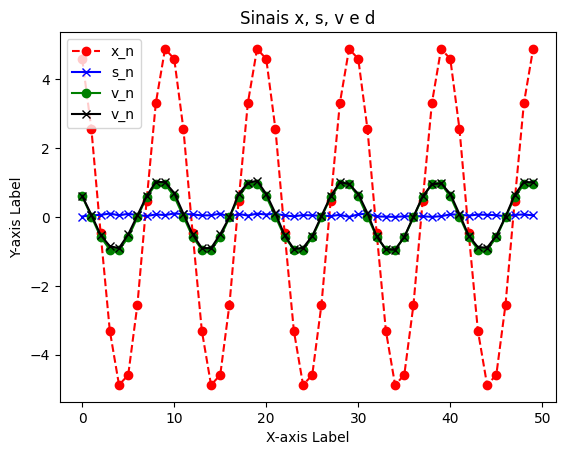

In [1]:
"""
PSI589 - Fundamentos de Adaptação e Aprendizado de Máquina
Aluno: Heitor Albuquerque
Exercício Algoritmo LMS
"""

import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA

"""
# M : numero de coeficientes
M = 2

# Matriz R
# R_xx(k) = 25/2 * cos*(2*pi*k/10)

# Vetor R_xx
R_xx = np.zeros(M)
R_xx = R_xx.reshape(1,-1)
print("R_xx é: \n", R_xx)

for index in range (M):
  R_xx[1, index] = (25/2)*np.cos(2*np.pi*index/10)

print("R_xx é: \n", R_xx)
"""

N = 500
var_s = 0.01

n = np.arange(N)
n = n.reshape(-1,1)

# phi_x é fase aleatória inicial
phi_x = np.random.rand(1,1)*2*np.pi

# 𝑥(𝑛)=5sen(2𝜋𝑛/10+𝜙𝑥)
x_n = 5*np.sin(2*np.pi*n/10+phi_x)
x_n = x_n.reshape(-1,1)

# 𝑣(𝑛)=sen(2𝜋𝑛/10+𝜋/6+𝜙𝑣)
v_n = np.sin(2*np.pi*n/10+np.pi/6+phi_x)
v_n = v_n.reshape(-1,1)

# s : ruido gaussinao com 𝜎^2=0,01

s_n = np.random.rand(N)*np.sqrt(var_s)
s_n = s_n.reshape(-1,1)

# d: sinal desejado
# d = s_n + v_n
d_n = s_n + v_n

plt.plot(n[:50], x_n[:50], color='red', linestyle='--', marker='o', label='x_n')
plt.plot(n[:50], s_n[:50], color='blue', linestyle='-', marker='x', label='s_n')
plt.plot(n[:50], v_n[:50], color='green', linestyle='-', marker='o', label='v_n')
plt.plot(n[:50], d_n[:50], color='black', linestyle='-', marker='x', label='v_n')

plt.xlabel("X-axis Label")
plt.ylabel("Y-axis Label")
plt.title("Sinais x, s, v e d")
plt.legend()
plt.show() # Displays the plot


In [2]:
# gerar função de wiener

def Wiener_HA(x: np.ndarray, d: np.ndarray, M: int):
  R = np.zeros((M,M))
  p = np.zeros(M)
  p = p.reshape(-1,1)

  x_M = np.zeros(M)
  x_M = x_M.reshape(-1,1)

  # numero de amostras
  N = x.shape[0]

  for index_W in range (N):
      # vetor x dentro do loop

      x_M[1:M] = x_M[0:M-1]
      x_M[0] = x[index_W]

#      print("Valores de x_M \n", x_M)

      # Tamanho de R (Nx1) (1xN) = NxN
      R = R + x_M@x_M.T

#      print("Valores de R \n", R)
      p = p + x_M * d[index_W]

#      print("Valores de p \n", p)

  R = R/N
  p = p/N

  # 𝐰o=𝐑−1𝐩

  w_o = np.linalg.solve(R, p)

  return w_o, R, p



In [3]:
"""
  Exercício
  Fazer o cálculo para M = 2 N  = 500

 """
 # os vetores x_n e d_n já haviam sido previamente criados com N = 500

M=2

w_o, R, p = Wiener_HA(x_n, d_n, M)

print("\nValores de R\n", R)
print("\nValores de p\n", p)
print("\nValores de wo\n", w_o)

# R teorico
R_t = [[25/2, (25/2)*np.cos(2*np.pi/10)], [(25/2)*np.cos(2*np.pi/10), 25/2]]
print("\nValores de R teorico\n", R_t)

# p teorico
p_t = [[25/2, (25/2)*np.cos(2*np.pi/10+np.pi/6)]]
print("\nValores de p teorico\n", p_t)


Valores de R
 [[12.5        10.0679218 ]
 [10.0679218  12.45239767]]

Valores de p
 [[2.16824434]
 [1.01128212]]

Valores de wo
 [[ 0.30977595]
 [-0.16924595]]

Valores de R teorico
 [[12.5, np.float64(10.112712429686843)], [np.float64(10.112712429686843), 12.5]]

Valores de p teorico
 [[12.5, np.float64(5.084208038447505)]]


In [4]:
# Calculo da variância de d

# obtemos a média de d
mhu = np.sum(d_n)/(N-1)

# calculo do desvio de d
sigma_d = d_n - mhu

# calculo da variancia de d
var_d = np.sum(sigma_d ** 2)/(N-1)

# Jmin
Jmin = var_d - p.T @ w_o

print("\nJmin = ", Jmin)
print("\nVar_s = ", var_s)


Jmin =  [[0.00316086]]

Var_s =  0.01



Valores do filtro sao 
 [[ 0.30977595]
 [-0.16924595]]

Valores dos coeficientes da exponencial 
 [[1.        +0.j        ]
 [0.80901699-0.58778525j]]
Valor de H_InterFreq [[0.1728531+0.09948027j]]

Valores de fase estimada 
 [[0.52222438]]

Valores da magnitude estimada 
 [[0.1994355]]

O filtro H corrige a diferença de fase e de amplitude entre o sinal de entrada e o sinal desejado.

Solução usando a transformada de Fourier.

O valor de k na frequencia angular de 2pi/10 é  51

O valor de fase em 2pi/10 é  [0.52137064]

O valor de magnitude em 2pi/10 é  [0.19905653]


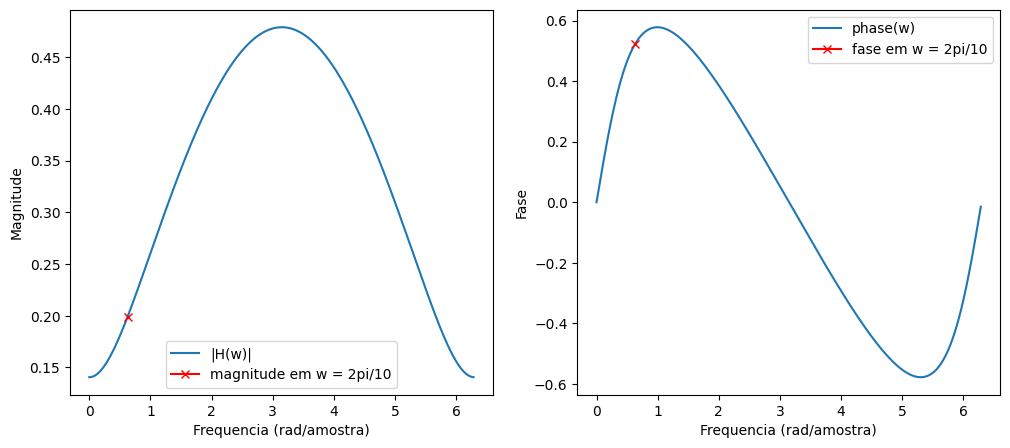

In [5]:
"""

Resposta em frequencia do filtor é obtida pelos coeficientes do filtro(w_o) multiplicados por e^(jwt)

Para avaliar na frequência de interferência basta substituir w por w_interf

w_interf = 2*np.pi/10

"""
h = np.array([w_o[0], w_o[1]])
#h = h.reshape(1,-1)
print("\nValores do filtro sao \n", h)
#print("\nDimensoes de h", h.shape)

k_exp = np.arange(M)
k_exp = k_exp.reshape(-1,1)
#print("\nValores dos indices da exponencial \n", k_exp)

e_jw = np.exp(1j*-2*np.pi*k_exp/10)
print("\nValores dos coeficientes da exponencial \n", e_jw)
#print("\nDimensoes da exponencial", e_jw.shape)

# Computando phase e magnitude em w = 2pi/10

H_InterFreq = np.dot(h.T,e_jw)
print("Valor de H_InterFreq", H_InterFreq)


faseEst = np.angle(H_InterFreq)
print("\nValores de fase estimada \n", faseEst)

magnitudeEst = np.abs(H_InterFreq)
print("\nValores da magnitude estimada \n", magnitudeEst)

print("\nO filtro H corrige a diferença de fase e de amplitude entre o sinal de entrada e o sinal desejado.")

print("\nSolução usando a transformada de Fourier.")

# Solução por fft
w_ = np.linspace(0,2*np.pi,512)
w_ = w_.reshape(-1,1)
#print("\nDimensoes de w_", w_.shape)

# Resposta em frequência H(jw)
H = np.fft.fft(h.T,512)
#print("\nEsses são os valores da resposta em frequência H(jw)\n", H)
#print("\nDimensoes de H", H.shape)

phase = np.angle(H)
#print("\nO valor de phase é: \n", phase)
#print("\nDimensoes de fase", phase.shape)

magnitude = np.abs(H)
#print("\nO valor de magnitude é: ", magnitude)
#print("\nDimensoes de magnitude", magnitude.shape)

# para a frequencia angular de 2*pi/10 obtemos a magnitude e phase
k_wo = int(512*(2*np.pi/10)/(2*np.pi))

print("\nO valor de k na frequencia angular de 2pi/10 é ", k_wo)

phase_kwo = phase.T[k_wo]
print("\nO valor de fase em 2pi/10 é ", phase_kwo)

magnitude_kwo = magnitude.T[k_wo]
print("\nO valor de magnitude em 2pi/10 é ", magnitude_kwo )


plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(w_,magnitude.T, label='|H(w)|')
plt.plot(w_[k_wo],magnitude.T[[k_wo]], marker='x', color='red', label='magnitude em w = 2pi/10')
plt.xlabel("Frequencia (rad/amostra)")
plt.ylabel("Magnitude")
plt.legend()

plt.subplot(1,2,2)
plt.plot(w_,phase.T, label='phase(w)')
plt.plot(w_[k_wo],phase.T[[k_wo]], marker='x', color='red', label='fase em w = 2pi/10')
plt.xlabel("Frequencia (rad/amostra)")
plt.ylabel("Fase")
plt.legend()



In [6]:
# Item b

# Autovalores da matriz R

autoval, autovec = LA.eig(R)

print("\nOs autovalores de R são\n", autoval)

lambda_max = np.max(autoval)
print("\nLambda max\n", lambda_max)

etha_max = 2/lambda_max
print("\nEtha max\n", etha_max)

print("\nEtha deve ficar entre 0 e", etha_max)


Os autovalores de R são
 [22.54414877  2.4082489 ]

Lambda max
 22.544148769474532

Etha max
 0.0887148155581754

Etha deve ficar entre 0 e 0.0887148155581754



Numero de iterações 500

Numero de coeficientes 2

Dimensao de w_lms (2, 500)

Dimensao de y_lms (500, 1)

Dimensao de e_lms (500, 1)

Valores de y_lms [-0.00210995]

Valor de erro [0.05917926]

Valor do filtro LMS [ 0.32403205 -0.16837357]

Dimensão x_cont
 (2, 500)


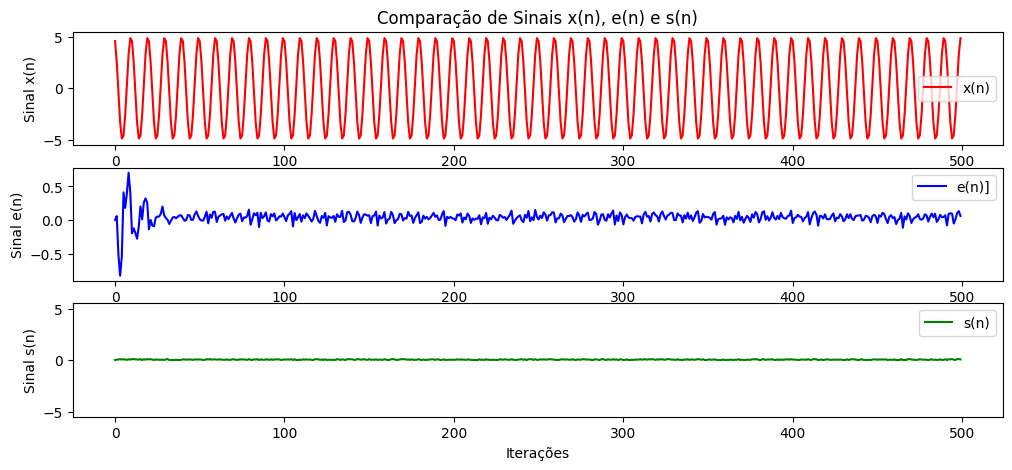

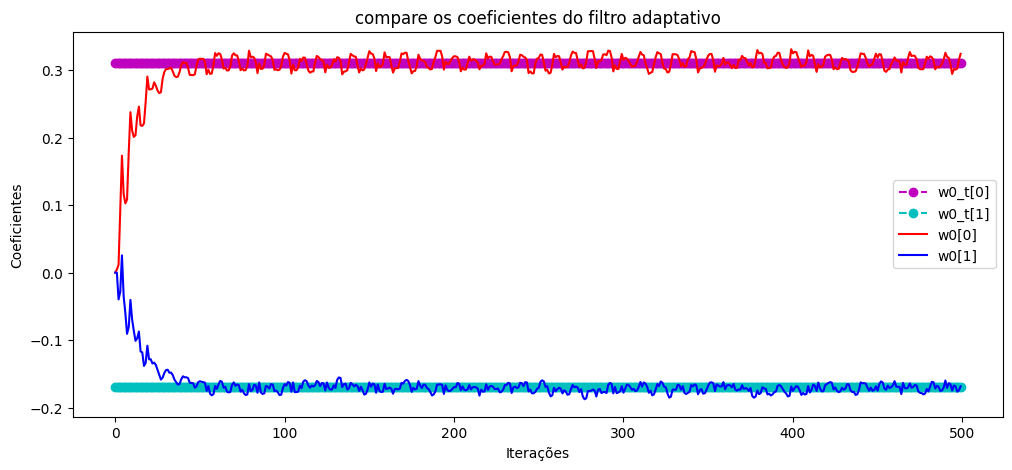

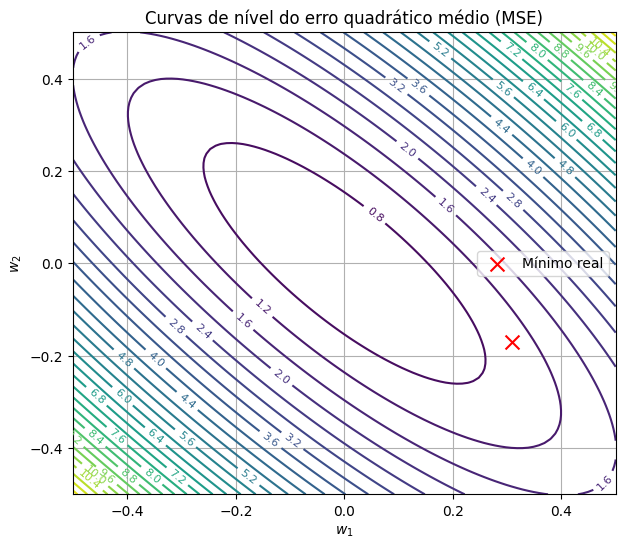

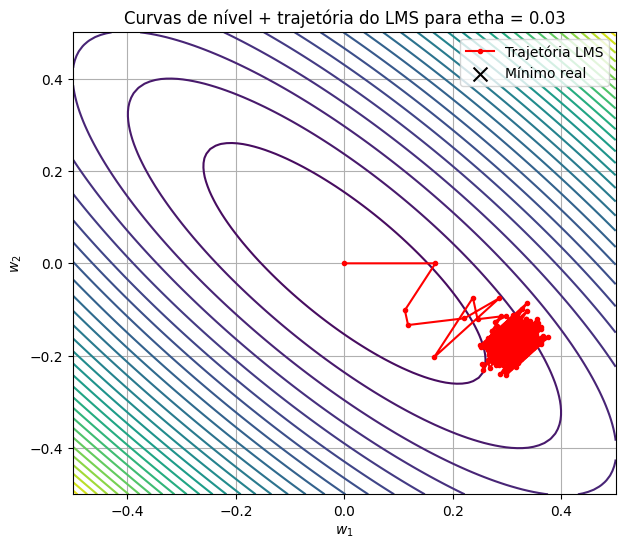

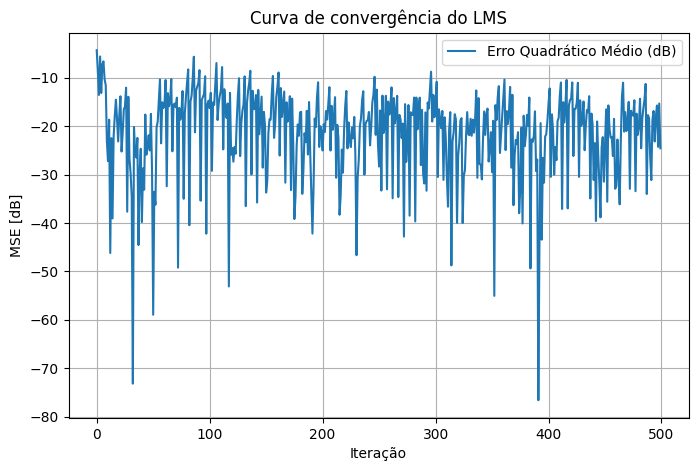

In [7]:
# Item c

"""
Algoritmo 1 Sumário do algoritmo LMS.

Inicialização: w(0)=0

   Para n = 1,2,...
 calcule:

  y(n) = x.T(n)w(n-1)
  e(n) = d(n)-y(n)
  w(n) = w(n-1)+etha e(n) x(n)

   Fim
"""
# Numero de iterações
N_lms = x_n.shape[0]
print("\nNumero de iterações", N_lms)

# Numero de coeficientes
Nc = h.shape[0]
print("\nNumero de coeficientes", Nc)

# etha = 0.03
etha_lms = 0.03

# Inicialização w(0)=0
w_lms = np.zeros((2, N_lms))
print("\nDimensao de w_lms", w_lms.shape)


#print("Dimensões de x", x_n.shape)


y_lms = np.zeros(N_lms)
y_lms = y_lms.reshape(-1,1)
print("\nDimensao de y_lms", y_lms.shape)

# vetor com as M amostras de entrada (x(n) x(n-1)... x(n-M))
x_lms_M = np.zeros(M)
x_lms_M = x_lms_M.reshape(-1,1)


# vetor desejado
#d_n = d_n.reshape(-1,1)
#print("\nDimensao de d_n", d_n.shape)

# vetor erro
e_lms = np.zeros(N_lms)
e_lms = e_lms.reshape(-1,1)
print("\nDimensao de e_lms", e_lms.shape)

# filtro temporário
w_lms_M = np.zeros(2)
w_lms_M = w_lms_M.reshape(-1,1)


for index_lms in range (1, N_lms):
  x_lms_M[1:] = x_lms_M[0:M-1]
  x_lms_M[0] = x_n[index_lms]

  #print("\nDimensao x_lms\n", x_lms_M.shape)

  w_lms_M = w_lms[:, index_lms-1]
 # w_lms_M = w_lms_M.reshape(-1,1)
  #print("\nDimensao w_lms_M\n", w_lms_M.shape)

# y_lms[index_lms] = np.dot(x_lms_M.T, w_lms_M.T)
  y_lms[index_lms] = x_lms_M.T @ w_lms_M

  # print("\nValor de d_n", d_n[index_lms])

  e_lms[index_lms] = d_n[index_lms] - y_lms[index_lms]
  #print("\nDimensao e_lms\n", e_lms.shape)

  w_lms[:,index_lms] = w_lms_M + etha_lms * e_lms[index_lms] * x_lms_M.flatten()

print("\nValores de y_lms", y_lms[2])
print("\nValor de erro", e_lms[1])
print("\nValor do filtro LMS", w_lms[:,-1])


# observe inicialmente os sinais de entrada  𝑥(𝑛) , de erro  𝑒(𝑛)  e  𝑠(𝑛)  em gráficos na mesma escala;

# eixo x
t_lms = np.arange(N_lms)

plt.figure(figsize=(12,5))
plt.subplot(3,1,1)
plt.title("Comparação de Sinais x(n), e(n) e s(n)")
plt.plot(t_lms,x_n, color='red', linestyle='-',  label='x(n)')
plt.xlabel("Iterações")
plt.ylabel("Sinal x(n)")
plt.ylim(-5.5, 5.5)
plt.legend()

plt.subplot(3,1,2)
plt.plot(t_lms,e_lms, color='blue', linestyle='-', label='e(n)]')
plt.xlabel("Iterações")
plt.ylabel("Sinal e(n)")
plt.legend()

plt.subplot(3,1,3)
plt.plot(t_lms,s_n, color='green', linestyle='-', label='s(n)')
plt.xlabel("Iterações")
plt.ylabel("Sinal s(n)")
plt.ylim(-5.5, 5.5)
plt.legend()



# compare os coeficientes do filtro adaptativo com os coeficientes ótimos calculados no item a, fazendo um gráfico dos coeficientes ao longo das iterações;




# coeficientes teoricos
w0_t0 = np.ones((M, N_lms))*w_o
#w0_t0.flatten()
#w0_t1 = np.ones(N_lms)*k_wo[1]
#w0_t1.flatten()


plt.figure(figsize=(12,5))


plt.plot(t_lms, w0_t0[0,:], color='m', linestyle='--', marker='o', label='w0_t[0]')
plt.plot(t_lms, w0_t0[1,:], color='c', linestyle='--', marker='o', label='w0_t[1]')


plt.plot(t_lms,w_lms[0,:], color='red', linestyle='-',  label='w0[0]')
plt.plot(t_lms,w_lms[1,:], color='blue', linestyle='-', label='w0[1]')

plt.title("compare os coeficientes do filtro adaptativo")
plt.xlabel("Iterações")
plt.ylabel("Coeficientes")
plt.legend()




# trace as curvas de nível da superfície de erro e sobre elas, a trajetória dos coeficientes;

w_true = w_o

x_cont = np.zeros((2,N))
print("\nDimensão x_cont\n", x_cont.shape)
x_cont[0,:] = x_n.flatten()
x_cont[1,1:] = x_n[0:-1].flatten()

#  Grade de coeficientes
w1_vals = np.linspace(-0.5, 0.5, 100)
w2_vals = np.linspace(-0.5, 0.5, 100)
W1, W2 = np.meshgrid(w1_vals, w2_vals)

# Cálculo do erro quadrático médio (superfície de custo)
J = np.zeros_like(W1)

for i in range(W1.shape[0]):
    for j in range(W1.shape[1]):
        w = np.array([W1[i, j], W2[i, j]])
        y_cont = w @ x_cont
        e = d_n - y_cont
        J[i, j] = np.mean(e**2)



# Plot das curvas de nível
plt.figure(figsize=(7,6))
contours = plt.contour(W1, W2, J, levels=30)
plt.clabel(contours, inline=True, fontsize=8)
plt.xlabel('$w_1$')
plt.ylabel('$w_2$')
plt.title('Curvas de nível do erro quadrático médio (MSE)')
plt.scatter(w_true[0], w_true[1], color='red', marker='x', s=100, label='Mínimo real')
plt.legend()
plt.grid(True)
plt.show()

# Execução do LMS para pegar a trajetória
etha_lms = 0.03
w = np.zeros(2)
traj = [w.copy()]
mse = np.zeros(N)

for n in range(N):
    y = w @ x_cont[:, n]
    e = d_n[n] - y
    w = w + 2 * etha_lms * e * x_cont[:, n]
    traj.append(w.copy())
    mse[n] = np.mean(e[:n+1]**2)

traj = np.array(traj)

#  Adiciona trajetória no gráfico
plt.figure(figsize=(7,6))
plt.contour(W1, W2, J, levels=30)
plt.plot(traj[:,0], traj[:,1], 'r.-', label='Trajetória LMS')
plt.scatter(w_true[0], w_true[1], color='black', marker='x', s=100, label='Mínimo real')
plt.xlabel('$w_1$')
plt.ylabel('$w_2$')
plt.legend()
plt.title('Curvas de nível + trajetória do LMS para etha = 0.03')
plt.grid(True)
plt.show()

# erro quadrático médio em dB
mse_db = 10 * np.log10(mse + 1e-12)  # evita log(0)

plt.figure(figsize=(8,5))
plt.plot(mse_db, label='Erro Quadrático Médio (dB)')
plt.xlabel('Iteração')
plt.ylabel('MSE [dB]')
plt.title('Curva de convergência do LMS')
plt.grid(True)
plt.legend()
plt.show()




In [15]:


"""
# Letra D

# Determine experimentalmente o valor máximo de etha para convergência do algoritmo LMS
# e compare-o com o valor calculado no item b para o algoritmo Steepest Descent.

# Ir crescendo o valor de Etha e verificar quando os coeficientes divergem

# Parâmetros reaproveitados
# Numero de iterações
N_lms = x_n.shape[0]

# Numero de coeficientes
Nc = h.shape[0]

# coeficientes teoricos
w0_t0 = np.ones((M, N_lms))*w_o

"""

print("Letra D")

#plt.figure(figsize=(12,400))



for passo in range (100):
  # etha = 0.03
  etha_lms = 0.03+0.001 * passo

  # conta o numero de vezes que o algoritmo divergiu para cada etha
  count = 0

  Nteste = 200

  # array com ethas e percentual de divergencia
  percent_div_etha = np.zeros((Nteste, 2))

  for teste in range (Nteste):

    # Gerando novos sinais a cada entrada de teste

    # phi_x é fase aleatória inicial
    phi_x = np.random.rand(1,1)*2*np.pi

    # 𝑥(𝑛)=5sen(2𝜋𝑛/10+𝜙𝑥)
    x_n = 5*np.sin(2*np.pi*n/10+phi_x)
    x_n = x_n.reshape(-1,1)

    # 𝑣(𝑛)=sen(2𝜋𝑛/10+𝜋/6+𝜙𝑣)
    v_n = np.sin(2*np.pi*n/10+np.pi/6+phi_x)
    v_n = v_n.reshape(-1,1)

    # s : ruido gaussinao com 𝜎^2=0,01

    s_n = np.random.rand(N)*np.sqrt(var_s)
    s_n = s_n.reshape(-1,1)

    # d: sinal desejado
    # d = s_n + v_n
    d_n = s_n + v_n


    # Inicialização w(0)=0
    w_lms = np.zeros((2, N_lms))
    y_lms = np.zeros(N_lms)
    y_lms = y_lms.reshape(-1,1)

    # vetor com as M amostras de entrada (x(n) x(n-1)... x(n-M))
    x_lms_M = np.zeros(M)
    x_lms_M = x_lms_M.reshape(-1,1)

    # vetor erro
    e_lms = np.zeros(N_lms)
    e_lms = e_lms.reshape(-1,1)

    # filtro temporário
    w_lms_M = np.zeros(2)
    w_lms_M = w_lms_M.reshape(-1,1)

    for index_lms in range (1, N_lms):
      x_lms_M[1:] = x_lms_M[0:M-1]
      x_lms_M[0] = x_n[index_lms]

      w_lms_M = w_lms[:, index_lms-1]
      y_lms[index_lms] = x_lms_M.T @ w_lms_M
      e_lms[index_lms] = d_n[index_lms] - y_lms[index_lms]
      w_lms[:,index_lms] = w_lms_M + etha_lms * e_lms[index_lms] * x_lms_M.flatten()

    #if np.isnan(e_lms).any():
    if np.linalg.norm(w_lms_M)/np.linalg.norm(w_true) > 3:
      count = count +1

  print("\nValor de etha", etha_lms)
  print("\nNúmero de vezes que divergiu\n", count)
  print("\nPercentual de divergencia de etha", count/Nteste)
#  percent_div_etha[teste, 0] = etha_lms
#  percent_div_etha[teste, 1] = count/Nteste

"""

plt.figure(figsize=(12,8))
plt.plot(percent_div_etha[:,0].flatten(), percent_div_etha[:,1].flatten(), linestyle='solid' ,color='b')
plt.title('Probabilidade de divergencia de etha')
plt.xlabel("etha")
plt.ylabel("P_divergencia(etha)")

"""

print("\n Etha e Percentual de divergência\n", percent_div_etha[-10:])

"""

  plt.subplot(60,1, passo+1)
  plt.plot(t_lms, w0_t0[0,:], color='m', linestyle='--', marker='o', label='w0_t[0]')
  plt.plot(t_lms, w0_t0[1,:], color='c', linestyle='--', marker='o', label='w0_t[1]')


  plt.plot(t_lms,w_lms[0,:], color='red', linestyle='-',  label='w0[0]')
  plt.plot(t_lms,w_lms[1,:], color='blue', linestyle='-', label='w0[1]')
  plt.title(f'Coeficientes com etha = {etha_lms:.4f}')


  plt.xlabel("Iterações")
  plt.ylabel("Coeficientes")
  plt.legend()

plt.show()

"""

print(" O valor maximo de etha é 0.068, pois em 0.069 ocorre divergência.")
print("Este valor é inferior ao etha teorioco máximo ", etha_max)

Letra D

Valor de etha 0.03

Número de vezes que divergiu
 0

Percentual de divergencia de etha 0.0

Valor de etha 0.031

Número de vezes que divergiu
 0

Percentual de divergencia de etha 0.0

Valor de etha 0.032

Número de vezes que divergiu
 0

Percentual de divergencia de etha 0.0

Valor de etha 0.033

Número de vezes que divergiu
 0

Percentual de divergencia de etha 0.0

Valor de etha 0.034

Número de vezes que divergiu
 0

Percentual de divergencia de etha 0.0

Valor de etha 0.034999999999999996

Número de vezes que divergiu
 0

Percentual de divergencia de etha 0.0

Valor de etha 0.036

Número de vezes que divergiu
 0

Percentual de divergencia de etha 0.0

Valor de etha 0.037

Número de vezes que divergiu
 0

Percentual de divergencia de etha 0.0

Valor de etha 0.038

Número de vezes que divergiu
 0

Percentual de divergencia de etha 0.0

Valor de etha 0.039

Número de vezes que divergiu
 0

Percentual de divergencia de etha 0.0

Valor de etha 0.04

Número de vezes que divergi


Teste da funcao LMS

Valor de w lms
 [ 0.32403205 -0.16837357]

Valor de erro lms
 [0.06043679]

Valor medio do MSE em regime é Jss
 0.004664582853779445

Valor de Jmin
 [[0.00316086]]

Valor de excesso do MSE em regime é o EMSE Jex
 [[0.00150372]]

Valor do desajuste do experimento é M
 [[0.47573146]]


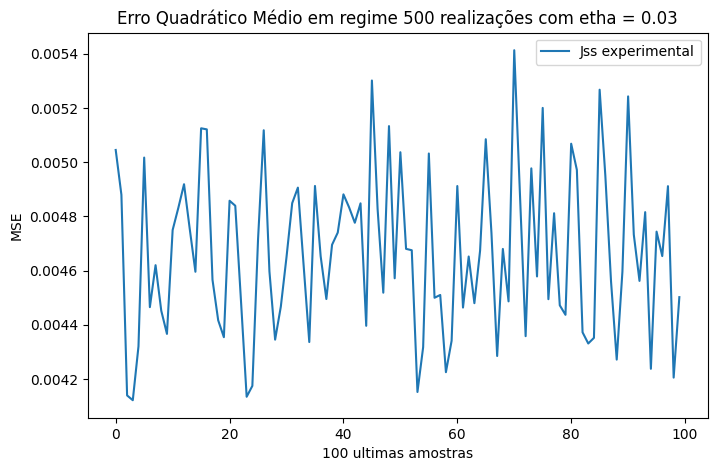

In [9]:
"""
  E) Obtenha uma aproximação para J(n) = E{e^2} considerando uma média de 500 realizações de e^2(n).
      Note que em cada realização, um novo valor de phi e um novo s(n) devem ser considerados. Pede-se:

      * obtenha graficamente o valor do MSE em regime;
      * a partir do valor do MSE experimental e do calculado no item a, estime os valores experimentais do EMSE e do desajuste;
      * calcule os valores teóricos do desajuste e do EMSE e compare com os valores experimentais.

"""

# função LMS

"""
  Função LMS

  x    :  vetor de entrada de sinais
  d    :  vetor desejado
  etha :  passo
  M    :  numero de coeficientes do filtro w
"""
def lms_ha(x, d, etha, M):

  # número de amostras
  N_lms = x.shape[0]

  # Inicialização w(0)=0
  w_lms = np.zeros((M, N_lms))

  y_lms = np.zeros(N_lms)
  y_lms = y_lms.reshape(-1,1)

  # vetor com M amostras para entrada (x(n) x(n-1)... x(n-M))
  x_lms_M = np.zeros(M)
  x_lms_M = x_lms_M.reshape(-1,1)

  # vetor erro
  e_lms = np.zeros(N_lms)
  e_lms = e_lms.reshape(-1,1)
  #print("\nDimensao de e_lms", e_lms.shape)

  # filtro temporário
  w_lms_M = np.zeros(2)
  w_lms_M = w_lms_M.reshape(-1,1)


  for index_lms in range (1, N_lms):
    x_lms_M[1:] = x_lms_M[0:M-1]
    x_lms_M[0] = x[index_lms]

    w_lms_M = w_lms[:, index_lms-1]

    y_lms[index_lms] = x_lms_M.T @ w_lms_M

    e_lms[index_lms] = d[index_lms] - y_lms[index_lms]

    w_lms[:,index_lms] = w_lms_M + etha * e_lms[index_lms] * x_lms_M.flatten()


  return y_lms, e_lms, w_lms

# exemplo de forma de chamar a funcao lms_ha
y_lms, e_lms, w_lms = lms_ha(x_n, d_n, 0.03, 2)

print("\nTeste da funcao LMS")
print("\nValor de w lms\n", w_lms[:,-1])
print("\nValor de erro lms\n", e_lms[-1])


# 500 realizações com novos valores de phi e s(n)
# valor de etha
etha_new = 0.03

# Numero de amostras
Na = x_n.shape[0]

# Numero de realizacoes
Nr = 500

# Numero de coeficientes
Nc_new = 2

# Matriz que contera as N realizações do vetor de erros
e500 = np.zeros((Na,Nr))

for indexR in range (Nr):

  var_s = 0.01

  n = np.arange(Na)
  n = n.reshape(-1,1)

  # Novo phi_x é fase aleatória inicial
  phi_x_new = np.random.rand(1,1)*2*np.pi

  # 𝑥(𝑛)=5sen(2𝜋𝑛/10+𝜙𝑥)
  x_new = 5*np.sin(2*np.pi*n/10+phi_x_new)
  x_new = x_new.reshape(-1,1)

  # 𝑣(𝑛)=sen(2𝜋𝑛/10+𝜋/6+𝜙𝑣)
  v_new = np.sin(2*np.pi*n/10+np.pi/6+phi_x_new)
  v_new = v_new.reshape(-1,1)

  # s : ruido gaussinao com 𝜎^2=0,01
  s_new = np.random.rand(Na)*np.sqrt(var_s)
  s_new = s_new.reshape(-1,1)

  # d: sinal desejado
  # d = s + v
  d_new = s_new + v_new

  # calculo LMS
  y_lms_new, e_lms_new, w_lms_new = lms_ha(x_new, d_new, etha_new, Nc_new)

  # matriz que acumula os erros das 500 realizações

  e500[:,indexR] = e_lms_new.flatten()

#print("\nvalores do erro\n", e500[])

# Considerando em regime as últimas 100 iterações
Nreg = 100

#Matriz contendo os 100 últimos elementos
e500reg2 = np.zeros((Nreg,Nr))
e500reg2 = e500[-Nreg:, :]
e500reg2 = e500reg2 ** 2
#print("Valores de erro quadrático em regime permanente", e500reg2[1,:] )

MSE500 = np.zeros(Nr)
MSE500.reshape(1,-1)

MSE500 = np.mean(e500reg2, axis=1)

#print("\nDimensão MSE500", MSE500.shape)
#print("\nValores de e500\n", e500[:,50])
#print("\nValores do MSE500", MSE500[0:10])


"""
Plot para verificar se os novos sinais estão sendo gerados
plt.plot(n[:50], x_new[:50], color='red', linestyle='--', marker='o', label='x_n')
plt.plot(n[:50], s_new[:50], color='blue', linestyle='-', marker='x', label='s_n')
plt.plot(n[:50], v_new[:50], color='green', linestyle='-', marker='o', label='v_n')
plt.plot(n[:50], d_new[:50], color='black', linestyle='-', marker='x', label='v_n')
"""

# J_ss é o valor do MSE em regime
J_ss = np.mean(MSE500)

# J_ss_min : minimo do experimental do MSE
J_ss_min = np.min(MSE500)

# J_ss = Jmin + Jex
# EMSE = Jex
J_ex = J_ss - Jmin

# Desajuste M = J_ex / J_min
M_exp = J_ex / Jmin

print("\nValor medio do MSE em regime é Jss\n", J_ss)
print("\nValor de Jmin\n", Jmin)
print("\nValor de excesso do MSE em regime é o EMSE Jex\n", J_ex)
print("\nValor do desajuste do experimento é M\n", M_exp)

# Plot do Erro Quadrático Médio em Regime de cada realização
plt.figure(figsize=(8,5))
plt.plot( MSE500, label='Jss experimental')
# plt.plot(np.argmin(MSE500), J_ss_min, color='red', marker='x', label='Jss min experimental')
plt.xlabel('100 ultimas amostras')
plt.ylabel('MSE')
plt.title('Erro Quadrático Médio em regime 500 realizações com etha = 0.03')

plt.legend()
plt.show()



In [10]:
"""

Função EMSE teorico

  x          :  vetor de entrada de sinais
  Nc         :  numero de coeficientes
  etha       :  passo
  sigma_v    :  desvio padrao do sinal indesejado
  M_t.       :  Desajuste teorico
  EMSE_t     :  Erro quadratico medio em excesso

  EMSE_t = (etha* (sigma_v)^2 * Traço(R))/(2-etha * Traço(R))

  M_t = (etha * Tr)/(2-etha*Tr)

"""

def emse_t_ha(x, Nc, etha, sigma_v):

  x_M = np.zeros(Nc)
  x_M = x_M.reshape(-1,1)

  R = np.zeros((Nc, Nc))

  for index in range (Nc):
      # vetor x dentro do loop

      x_M[1:Nc] = x_M[0:Nc-1]
      x_M[0] = x[index]

#      print("Valores de x_M \n", x_M)

      # Tamanho de R (Nx1) (1xN) = NxN
      R = R + x_M@x_M.T

  R = R/N


  Tr = np.trace(R)
  # print("\nValor do traço\n", Tr)

  EMSE_t = (etha * ((sigma_v)**2) * Tr )/(2-etha*Tr)

  M_t = (etha / 2) * Tr

  return EMSE_t, M_t

# Teste da função

EMSE_teste, M_teste = emse_t_ha(x_new, 2, etha_new, np.sqrt(var_s))


print("\nComparação dos valores teóricos e experimentais do desajsute e EMSE.")
print("\nEMSE teorico\n EMSE_t =",  EMSE_teste)
print("\nDesajuste teorico \n M_t =",  M_teste)

print("\nEMSE em regime \n EMSEexp =", J_ex)
print("\nDesajuste do experimento\n Mexp =", M_exp)


Comparação dos valores teóricos e experimentais do desajsute e EMSE.

EMSE teorico
 EMSE_t = 2.4275159811767456e-06

Desajuste teorico 
 M_t = 0.0002426926840807625

EMSE em regime 
 EMSEexp = [[0.00150372]]

Desajuste do experimento
 Mexp = [[0.47573146]]



Valor medio do MSE em regime é Jss
 0.003997603865599164

Valor de Jmin
 [[0.00316086]]

Valor de excesso do MSE em regime é o EMSE Jex
 [[0.00083674]]

Valor do desajuste do experimento é M
 [[0.26471969]]


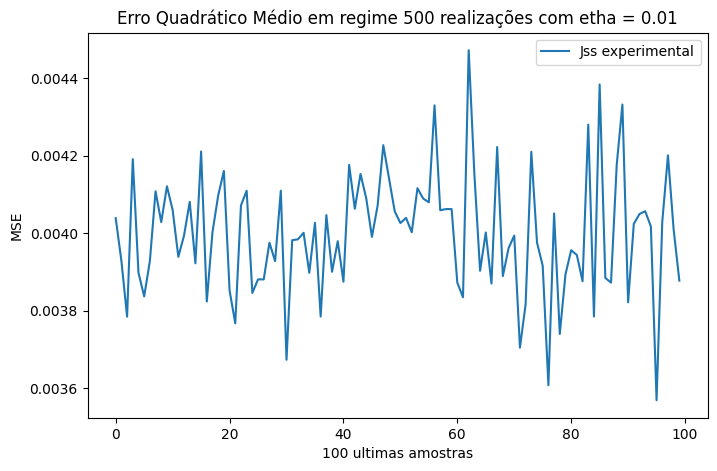

In [11]:
"""
  F) Repita o item e para etha = 0.01 e etha = 0.05. Trace num mesmo gráfico as curvas de J(n) em dB para etha = 0.01,
     e etha = 0.05 e verifique o compromisso entre velocidade de convergência e erro quadrático médio.

"""

# Matriz que acumula os resultados de Jss para etha 0.01, 0.03 e 0.05
J_01_03_05 = np.zeros((3,Nr))


J_01_03_05[1, :] = np.mean(e500**2, axis=1)

""""
e500reg2 = e500[-Nreg:, :]
e500reg2 = e500reg2 ** 2
#print("Valores de erro quadrático em regime permanente", e500reg2[1,:] )

MSE500 = np.zeros(Nr)
MSE500.reshape(1,-1)

MSE500 = np.mean(e500reg2, axis=1)
"""
# Repetindo e) para ETHA = 0.01

# 500 realizações com novos valores de phi e s(n)
# valor de etha
etha_new = 0.01

# Numero de amostras
Na = x_n.shape[0]

# Numero de realizacoes
Nr = 500

# Numero de coeficientes
Nc_new = 2

# Matriz que contera as N realizações do vetor de erros
e500 = np.zeros((Na,Nr))

for indexR in range (Nr):

  var_s = 0.01

  n = np.arange(Na)
  n = n.reshape(-1,1)

  # Novo phi_x é fase aleatória inicial
  phi_x_new = np.random.rand(1,1)*2*np.pi

  # 𝑥(𝑛)=5sen(2𝜋𝑛/10+𝜙𝑥)
  x_new = 5*np.sin(2*np.pi*n/10+phi_x_new)
  x_new = x_new.reshape(-1,1)

  # 𝑣(𝑛)=sen(2𝜋𝑛/10+𝜋/6+𝜙𝑣)
  v_new = np.sin(2*np.pi*n/10+np.pi/6+phi_x_new)
  v_new = v_new.reshape(-1,1)

  # s : ruido gaussinao com 𝜎^2=0,01
  s_new = np.random.rand(Na)*np.sqrt(var_s)
  s_new = s_new.reshape(-1,1)

  # d: sinal desejado
  # d = s + v
  d_new = s_new + v_new

  # calculo LMS
  y_lms_new, e_lms_new, w_lms_new = lms_ha(x_new, d_new, etha_new, Nc_new)

  # matriz que acumula os erros das 500 realizações

  e500[:,indexR] = e_lms_new.flatten()


# Considerando em regime as últimas 100 iterações
Nreg = 100

#Matriz contendo os 100 últimos elementos
e500reg2 = np.zeros((Nreg,Nr))
e500reg2 = e500[-Nreg:, :]
e500reg2 = e500reg2 ** 2

MSE500 = np.zeros(Nr)
MSE500.reshape(1,-1)
MSE500 = np.mean(e500reg2, axis=1)


# J_ss é o valor do MSE em regime
J_ss = np.mean(MSE500)

# J_ss_min : minimo do experimental do MSE
J_ss_min = np.min(MSE500)

# J_ss = Jmin + Jex
# EMSE = Jex
J_ex = J_ss - Jmin

# Desajuste M = J_ex / J_min
M_exp = J_ex / Jmin

print("\nValor medio do MSE em regime é Jss\n", J_ss)
print("\nValor de Jmin\n", Jmin)
print("\nValor de excesso do MSE em regime é o EMSE Jex\n", J_ex)
print("\nValor do desajuste do experimento é M\n", M_exp)

# Plot do Erro Quadrático Médio em Regime de cada realização
plt.figure(figsize=(8,5))
plt.plot( MSE500, label='Jss experimental')
plt.xlabel('100 ultimas amostras')
plt.ylabel('MSE')
plt.title('Erro Quadrático Médio em regime 500 realizações com etha = 0.01')

plt.legend()
plt.show()

J_01_03_05[0, :] = np.mean(e500**2, axis=1)


Valor medio do MSE em regime é Jss
 0.008653950306281575

Valor de Jmin
 [[0.00316086]]

Valor de excesso do MSE em regime é o EMSE Jex
 [[0.00549309]]

Valor do desajuste do experimento é M
 [[1.7378454]]


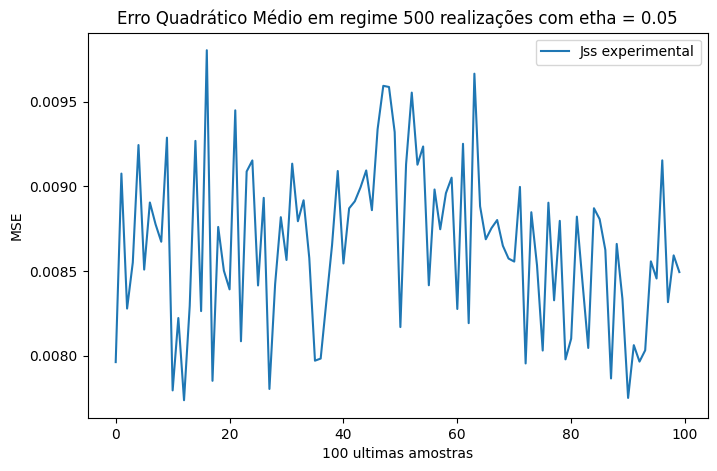

In [12]:
# Repetindo e) para ETHA = 0.05

# 500 realizações com novos valores de phi e s(n)
# valor de etha
etha_new = 0.05

# Numero de amostras
Na = x_n.shape[0]

# Numero de realizacoes
Nr = 500

# Numero de coeficientes
Nc_new = 2

# Matriz que contera as N realizações do vetor de erros
e500 = np.zeros((Na,Nr))

for indexR in range (Nr):

  var_s = 0.01

  n = np.arange(Na)
  n = n.reshape(-1,1)

  # Novo phi_x é fase aleatória inicial
  phi_x_new = np.random.rand(1,1)*2*np.pi

  # 𝑥(𝑛)=5sen(2𝜋𝑛/10+𝜙𝑥)
  x_new = 5*np.sin(2*np.pi*n/10+phi_x_new)
  x_new = x_new.reshape(-1,1)

  # 𝑣(𝑛)=sen(2𝜋𝑛/10+𝜋/6+𝜙𝑣)
  v_new = np.sin(2*np.pi*n/10+np.pi/6+phi_x_new)
  v_new = v_new.reshape(-1,1)

  # s : ruido gaussinao com 𝜎^2=0,01
  s_new = np.random.rand(Na)*np.sqrt(var_s)
  s_new = s_new.reshape(-1,1)

  # d: sinal desejado
  # d = s + v
  d_new = s_new + v_new

  # calculo LMS
  y_lms_new, e_lms_new, w_lms_new = lms_ha(x_new, d_new, etha_new, Nc_new)

  # matriz que acumula os erros das 500 realizações

  e500[:,indexR] = e_lms_new.flatten()


# Considerando em regime as últimas 100 iterações
Nreg = 100

#Matriz contendo os 100 últimos elementos
e500reg2 = np.zeros((Nreg,Nr))
e500reg2 = e500[-Nreg:, :]
e500reg2 = e500reg2 ** 2

MSE500 = np.zeros(Nr)
MSE500.reshape(1,-1)
MSE500 = np.mean(e500reg2, axis=1)


# J_ss é o valor do MSE em regime
J_ss = np.mean(MSE500)

# J_ss_min : minimo do experimental do MSE
J_ss_min = np.min(MSE500)

# J_ss = Jmin + Jex
# EMSE = Jex
J_ex = J_ss - Jmin

# Desajuste M = J_ex / J_min
M_exp = J_ex / Jmin

print("\nValor medio do MSE em regime é Jss\n", J_ss)
print("\nValor de Jmin\n", Jmin)
print("\nValor de excesso do MSE em regime é o EMSE Jex\n", J_ex)
print("\nValor do desajuste do experimento é M\n", M_exp)

# Plot do Erro Quadrático Médio em Regime de cada realização
plt.figure(figsize=(8,5))
plt.plot( MSE500, label='Jss experimental')
plt.xlabel('100 ultimas amostras')
plt.ylabel('MSE')
plt.title('Erro Quadrático Médio em regime 500 realizações com etha = 0.05')

plt.legend()
plt.show()

J_01_03_05[2, :] = np.mean(e500**2, axis=1)

/tmp/ipython-input-280906191.py:8: RuntimeWarning: divide by zero encountered in log
  plt.plot( 20*np.log(J_01_03_05[0, :]), color = 'red', label='J(n) com etha 0.01')
/tmp/ipython-input-280906191.py:9: RuntimeWarning: divide by zero encountered in log
  plt.plot( 20*np.log(J_01_03_05[1, :]), color = 'blue',label='J(n) com etha 0.03')
/tmp/ipython-input-280906191.py:10: RuntimeWarning: divide by zero encountered in log
  plt.plot( 20*np.log(J_01_03_05[2, :]), color = 'green',label='J(n) com etha 0.05')


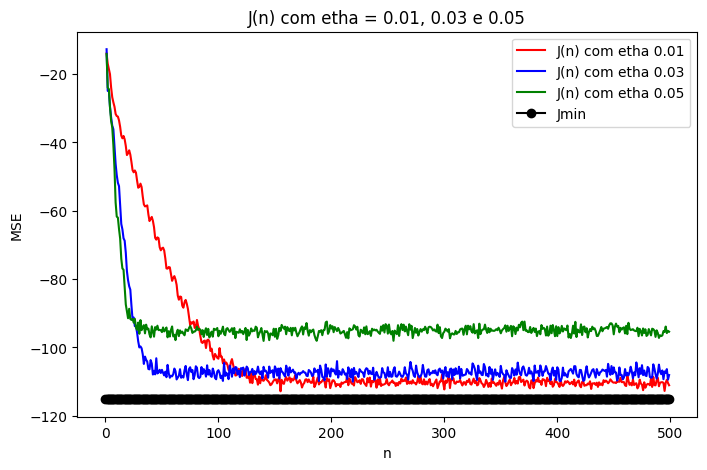


Conforme aumenta-se o passo etha obtem-se uma convergência mais rápida, entretanto aumenta-se o MSE.


In [13]:
# Trace num mesmo gráfico as curvas de J(n) e, dB e verifique o compromisso entre velocidade de convergência e erro quadrático médio.

v_jmin = np.ones((Nr))
v_jmin = v_jmin.reshape(-1,1)
v_jmin_db = 20*np.log(v_jmin*Jmin)

plt.figure(figsize=(8,5))
plt.plot( 20*np.log(J_01_03_05[0, :]), color = 'red', label='J(n) com etha 0.01')
plt.plot( 20*np.log(J_01_03_05[1, :]), color = 'blue',label='J(n) com etha 0.03')
plt.plot( 20*np.log(J_01_03_05[2, :]), color = 'green',label='J(n) com etha 0.05')
plt.plot(v_jmin_db, color ='black', marker='o', label='Jmin')
plt.xlabel('n')
plt.ylabel('MSE')
plt.title('J(n) com etha = 0.01, 0.03 e 0.05')

plt.legend()
plt.show()

print("\nConforme aumenta-se o passo etha obtem-se uma convergência mais rápida, entretanto aumenta-se o MSE.")